In [1]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
data = pd.read_csv("people.csv")

In [3]:
data.head(10)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low


In [4]:
data.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [5]:
data.tail()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low
14998,0.77,0.83,6,271,3,0,0,0,support,low


In [6]:
data.shape

(14999, 10)

In [7]:
data.info() #summary of dataset -- non null count and datatype of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
data['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [9]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [10]:
# statistical information
data.describe(include = 'all') #only numerical data

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [11]:
# Data Preprocessing
data.isna().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [12]:
# correlation
corr = data.corr()

<Axes: >

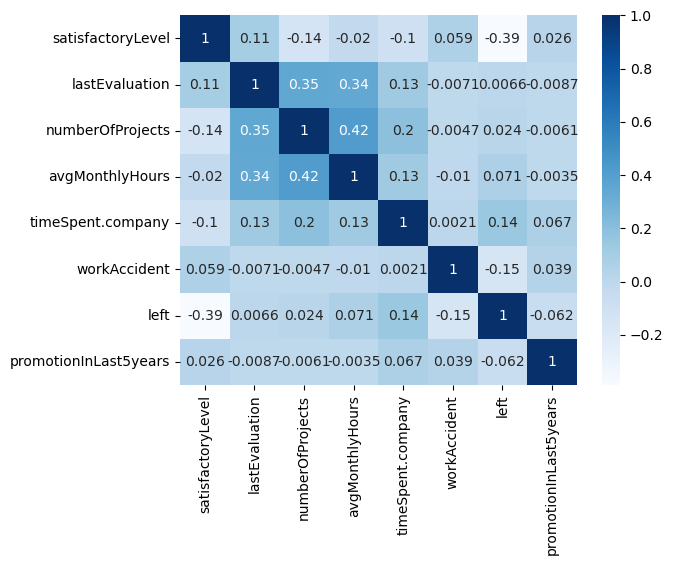

In [13]:
sns.heatmap(corr,annot=True,cmap='Blues')

In [14]:
data.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [15]:
ftr = ['promotionInLast5years','dept','numberOfProjects','timeSpent.company','salary','workAccident']

In [16]:
ftr

['promotionInLast5years',
 'dept',
 'numberOfProjects',
 'timeSpent.company',
 'salary',
 'workAccident']

In [17]:
for i,j in enumerate(ftr):
  print(i,j)

0 promotionInLast5years
1 dept
2 numberOfProjects
3 timeSpent.company
4 salary
5 workAccident


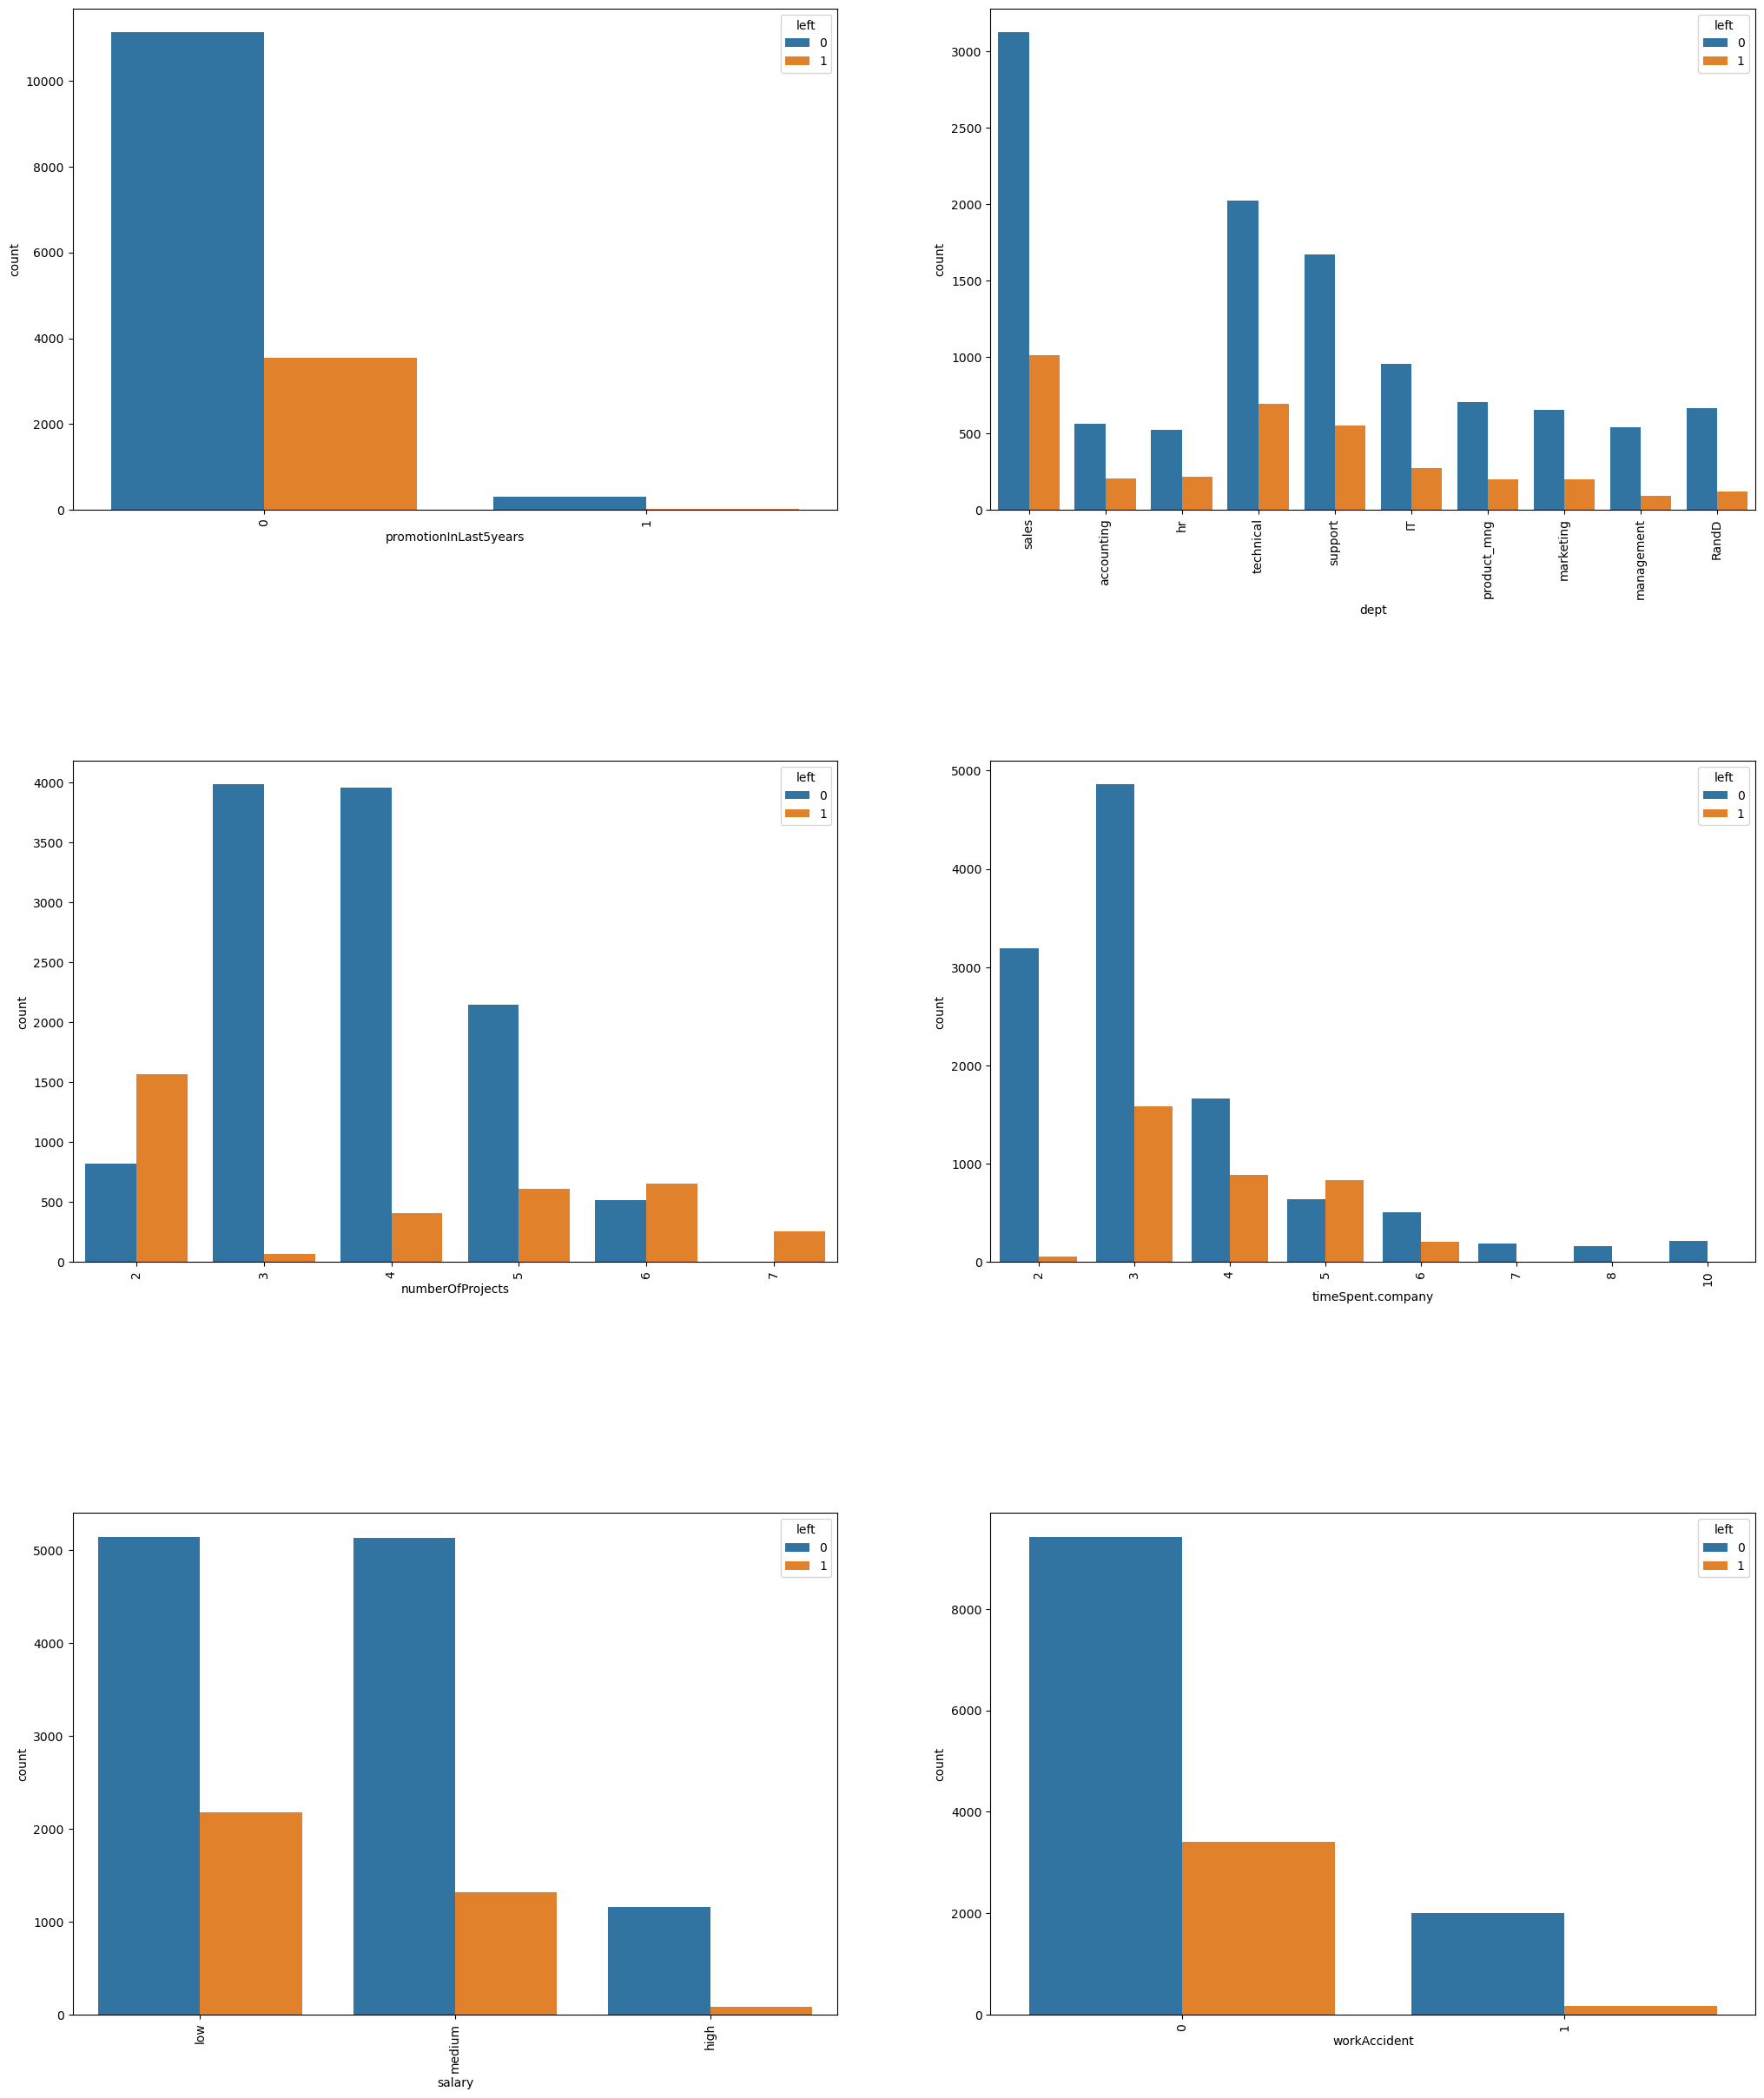

In [18]:
fig = plt.subplots(figsize = (25,30))

for p,q in enumerate(ftr):
  plt.subplot(3,2,p+1)
  plt.subplots_adjust(hspace = 0.5)
  sns.countplot(x=q, data = data, hue = 'left')
  plt.xticks(rotation = 90)

## Findings
1. Employees with less number of projects as well as with more number of projects are currently on the notice period
2. Year of Experience: min(3 years) and max(5 years)   -- crucial period for employees
3. Promotion Plays a significant role -- recognition and accredition system needs to be introduced or some career growth oppurtunities needs to be provided
4. Employees getting low and medium salary are currently serving notice period

## Solutions
1. keep projects near to 3-4
2. Increase Salary or Give them Promotion -- Hire interns or freshers
3. you provide them with upskilling
4. Incentive based pay system -- Competitor based Salary